In [45]:
import cv2
import numpy as np
import matplotlib.pylab as plt
from skimage.measure import regionprops

In [54]:
NAME = 'bag'

In [22]:
npzfile = np.load("predictions.npz")

In [23]:
imgs        = npzfile['imgs']
gt_bboxes   = npzfile['gt_bboxes']
pred_bboxes = npzfile['pred_bboxes']
scores      = npzfile['scores']
ious        = npzfile['ious']
speed       = npzfile['speed']

In [42]:
def show_predictions(img, gt_bbox, pred_bbox):
    gt_bbox = list(map(int, gt_bbox))
    pred_bbox = list(map(int, pred_bbox))
    cv2.rectangle(img, (gt_bbox[0], gt_bbox[1]),
                  (gt_bbox[0]+gt_bbox[2], gt_bbox[1]+gt_bbox[3]), (0, 255, 0), 3)
    cv2.rectangle(img, (pred_bbox[0], pred_bbox[1]),
                    (pred_bbox[0]+pred_bbox[2], pred_bbox[1]+pred_bbox[3]), (0, 255, 255), 3)
    plt.imshow(img)
    plt.show()

In [41]:
INDEX = 1

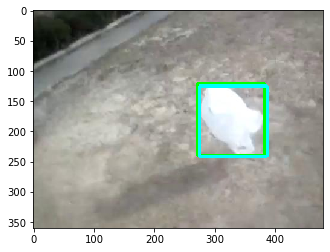

In [40]:
show_predictions(imgs[INDEX], gt_bboxes[INDEX], pred_bboxes[INDEX])

In [49]:
def centroid_assessment(gt_bbox, pred_bbox):
    x, y, w, h  = gt_bbox
    gt_centroid = (x+w/2, y+h/2)
    x, y, w, h  = pred_bbox
    pred_centroid = (x+w/2, y+h/2)
    return np.linalg.norm(np.array(gt_centroid)-np.array(pred_centroid))

In [50]:
centroid_assessment(gt_bboxes[-1], pred_bboxes[-1])

5.451379733900006

In [51]:
centroids_distances = []
for gt_bbox, pred_bbox in zip(gt_bboxes[1:], pred_bboxes[1:]):
    centroids_distances.append(centroid_assessment(gt_bbox, pred_bbox))

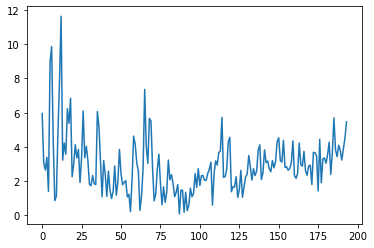

In [53]:
plt.plot(centroids_distances)
plt.show()

In [56]:
np.save(f'team7-{NAME}-centroids.npy', centroids_distances)